<a href="https://colab.research.google.com/github/Shrason/Projects/blob/main/Home_Loan_Approval_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement



## About Company :

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.


## Problem :

- The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form.

- These details are `Gender`, `Marital Status`, `Education`, `Number of Dependents`, `Income`, `Loan Amount`, `Credit History` and others.

- To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically.

# Hypothesis Generation


Below are some of the factors which can affect the Loan Approval (dependent variable for this loan prediction problem):

- **Salary**: Applicants with high income should have more chances of loan approval.
- **Previous history**: Applicants who have repayed their previous debts should have higher chances of loan approval.
- **Loan amount**: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- **Loan term**: Loan for less time period and less amount should have higher chances of approval.
- **EMI**: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.




# Import Libraries

In [2]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings   # to ignore any warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [3]:
train = pd.read_csv('loan_sanction_train.csv')

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# print data types for each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
# shape of the dataset
train.shape

(614, 13)

# Univaraite Analysis

## Target Variable

As its categorical variable let us look at its frequency table, percentage distribution and bar plot.

In [ ]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [ ]:
# Normalize can be set to True to print proportions insted of numbers.
train['Loan_Status'].value_counts(normalize='True')

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

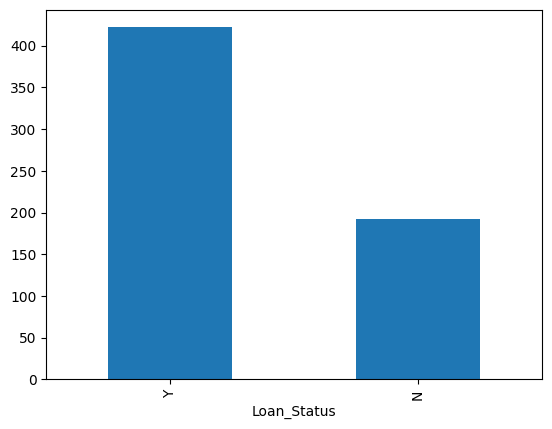

In [ ]:
train['Loan_Status'].value_counts().plot.bar()

Now lets visualize each variable separately.

**Categorical features**
- These features have categories (`Gender`, `Married`, `Self_Employed`, `Credit_History`,`Loan_Status`)

**Ordinal features:**
- Variables in categorical features having some order involved (`Dependents`, `Education`, `Property_Area`)

**Numerical features**
- These features have numerical values (`ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`)


## Independent Variable (Categorical)

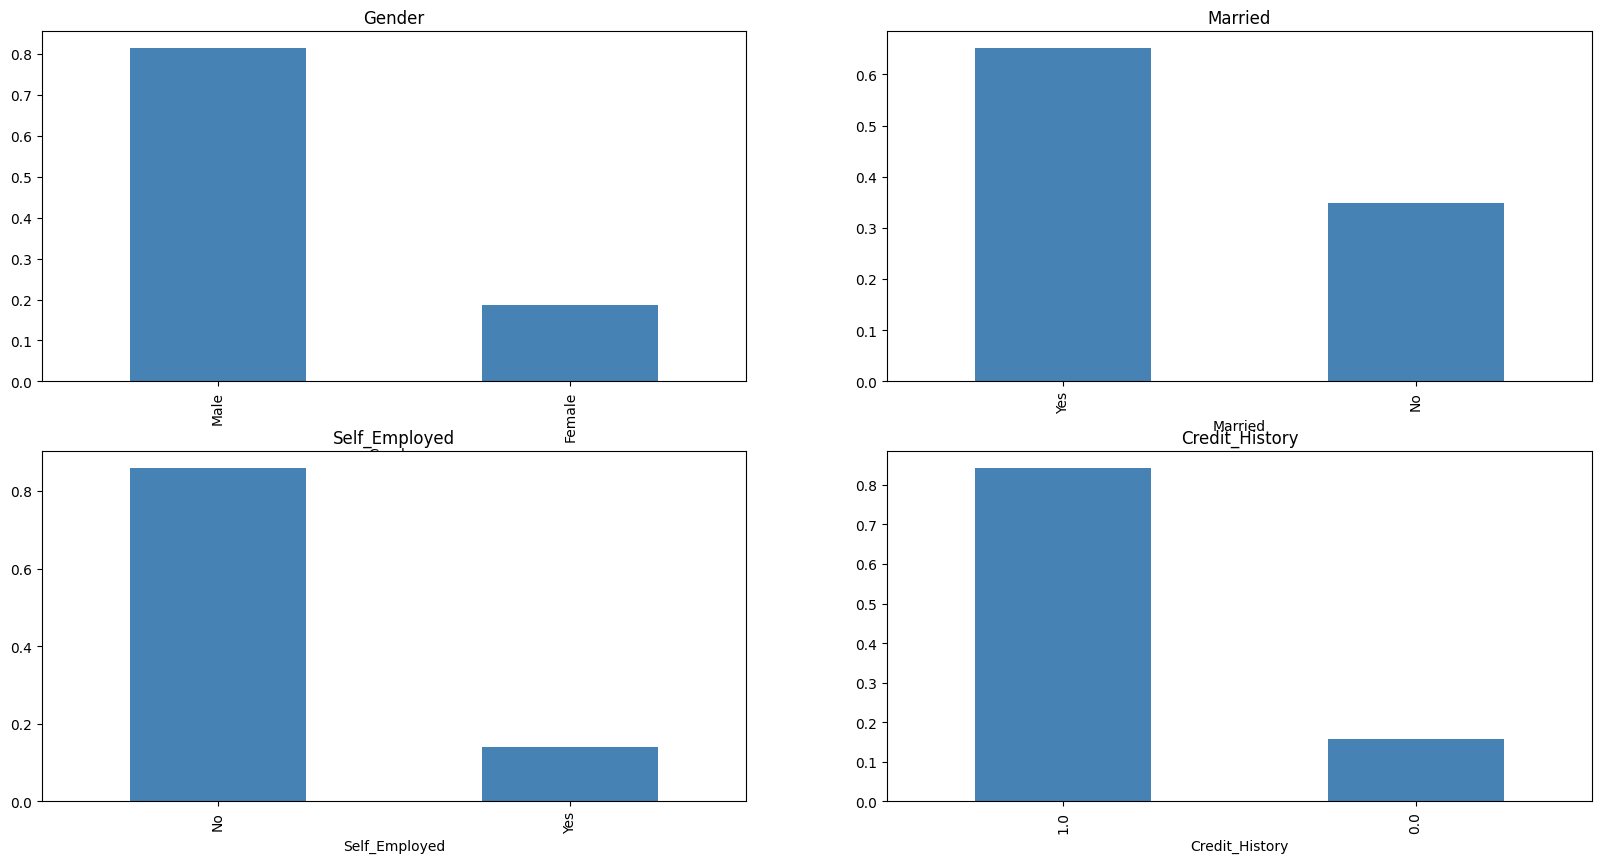

In [ ]:
plt.figure(1)
plt.subplot(221) # plt.subplot(nrows, ncols, plot_number)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender',color='steelblue')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married',color='steelblue')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed',color='steelblue')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History',color='steelblue')

plt.show()

It can be inferred from the above bar plots that:

- 80% applicants in the dataset are male.

- Around 65% of the applicants in the dataset are married.

- Around 15% applicants in the dataset are self employed.

- Around 85% applicants have repaid their debts.

## Independent variable (Ordinal)

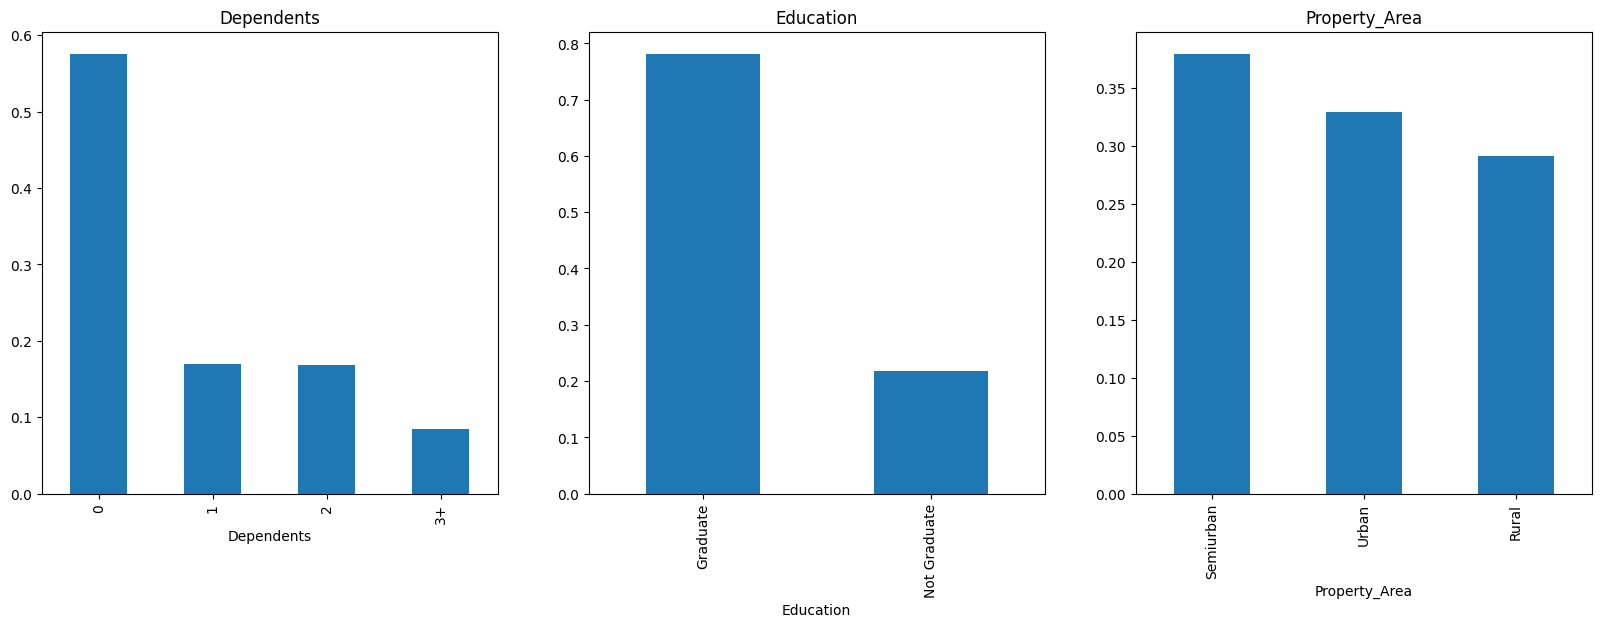

In [ ]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize = (20,6), title='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

It can be inferred from the above bar plots that:
- Applicant with zero dependents have high chance of loan approval.
- Non-graduated applicants have less chance of loan approval.
- Chances of loan approval for applicants from semi-urban and urban area is slightly more then from rural area.


## Independent Varaible (Numerical)

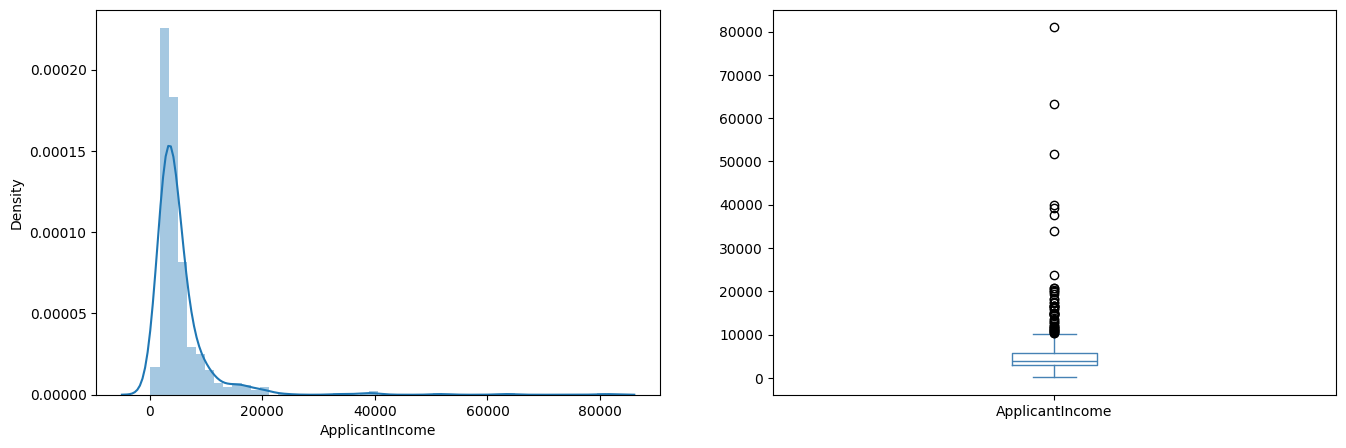

In [ ]:
# Distribution of Applicant income

plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5),color='steelblue')

plt.show()

Text(0.5, 0.98, '')

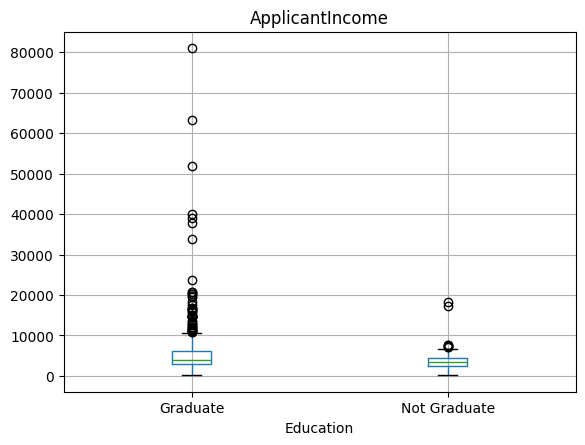

In [ ]:
# Applicant income by education

train.boxplot(column="ApplicantIncome", by = "Education")
plt.suptitle("")

There are higher number of graduates with very high incomes, which are appearing to be the outliers

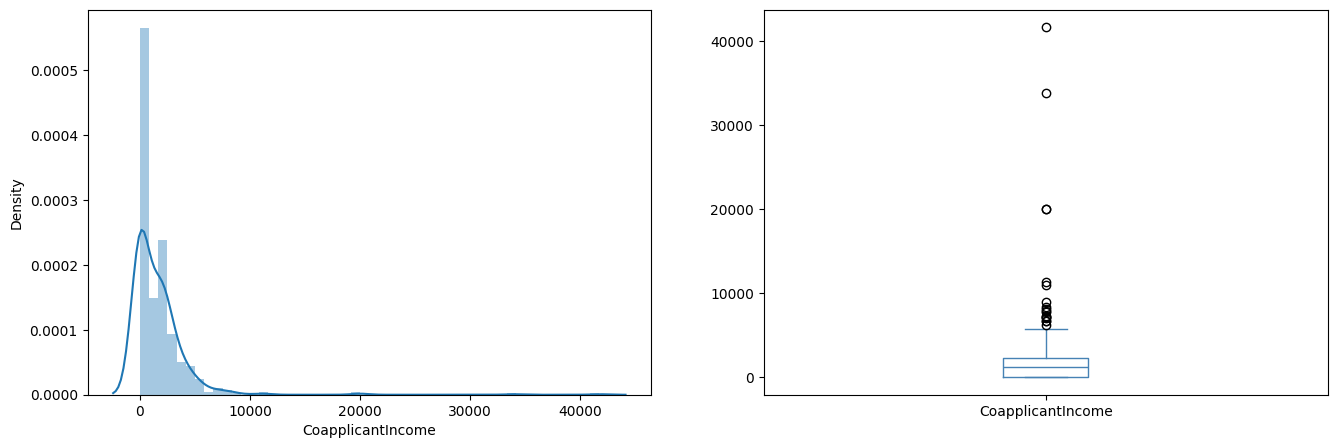

In [ ]:
# Distribution of co-applicant income

plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5),color='steelblue')
plt.show()

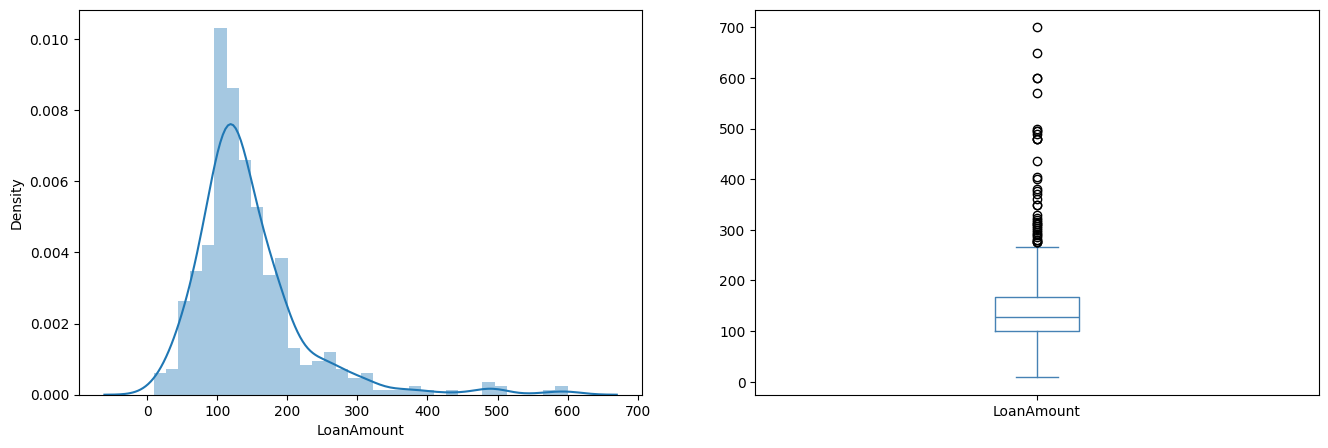

In [ ]:
# Distributon of Loan Amount

plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5),color='steelblue')

plt.show()

# Bivariate Analysis

## Categorical Independent Variable v/s Target Variable

<Axes: xlabel='Gender'>

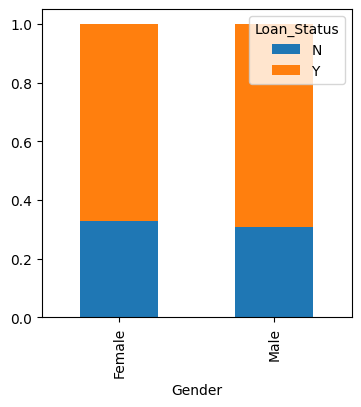

In [ ]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis =0).plot(kind="bar",stacked=True,figsize=(4,4))

Proportion of female and male applicants is more or less same for both approved and unapproved loans.

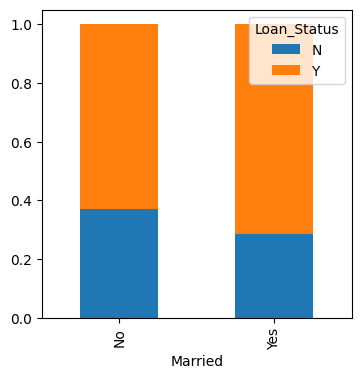

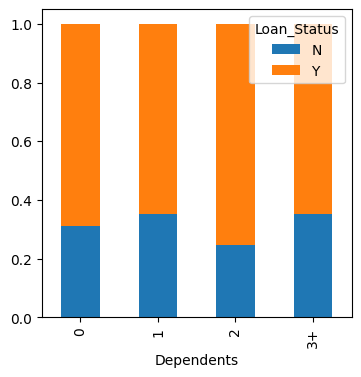

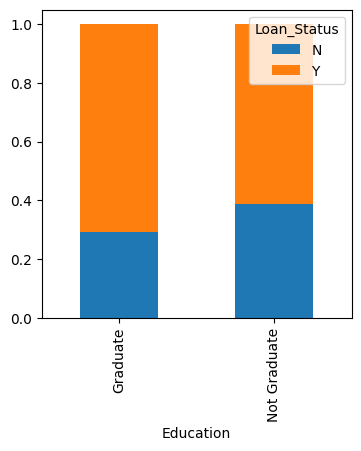

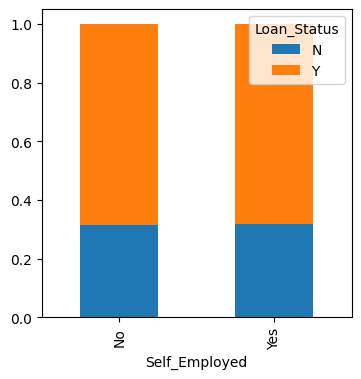

In [ ]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

- Proportion of marrid applicant is higher for the approved loans.
- Distribution of applicant with 1 or 3+ dependets is similar accross both the categories of Loan_Status
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot

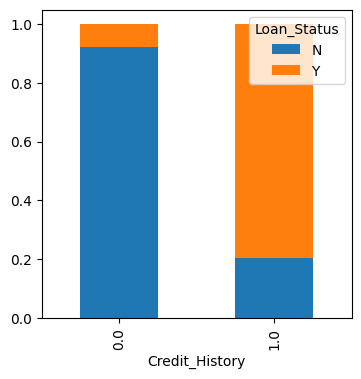

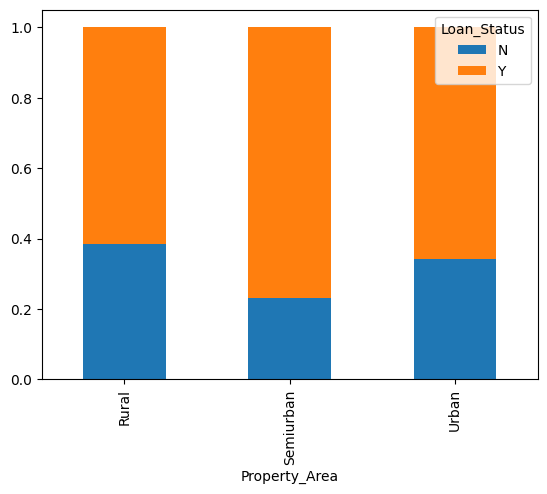

In [ ]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

## Numerical Independent Variable vs Target

We will try to find the mean income of people for which the loan has approved vs mean income of people for which the has not approved.

<Axes: xlabel='Loan_Status'>

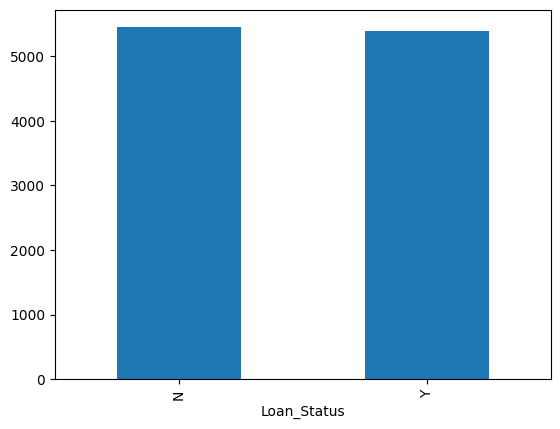

In [ ]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

lets make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin

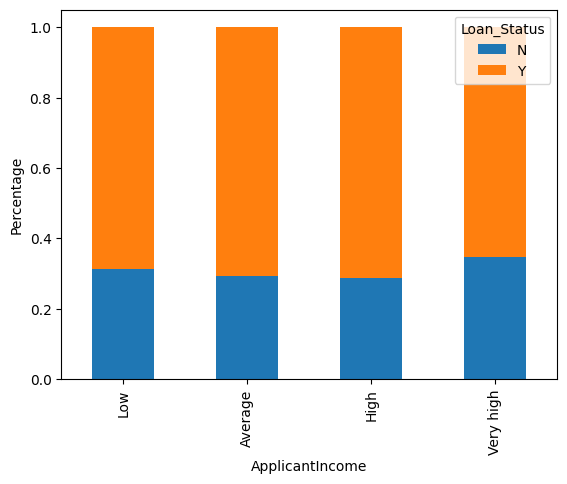

In [ ]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

analyze the coapplicant income and loan amount variable

In [ ]:
bins = [0,1000,3000,42000]
group = ['Low', 'Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

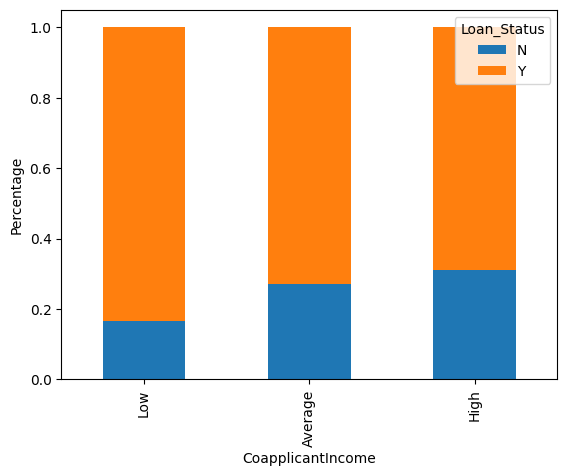

In [ ]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

It shows that coapplicants income is less the chances of loan approval are high. Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total_Income on the Loan_Status.

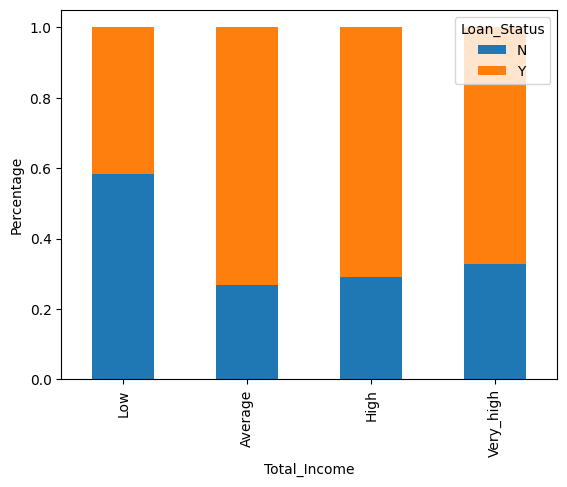

In [ ]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very_high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

Let’s visualize the Loan amount variable.

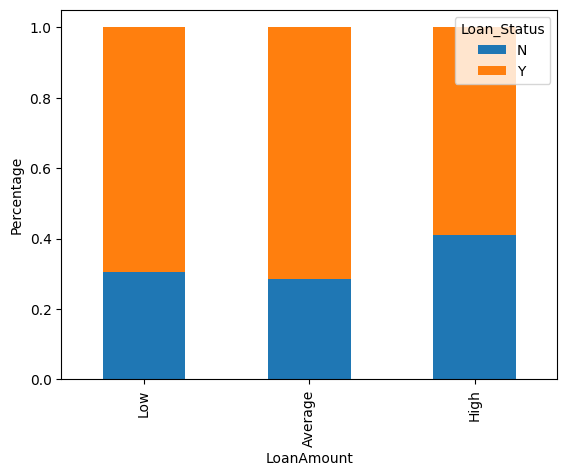

In [ ]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

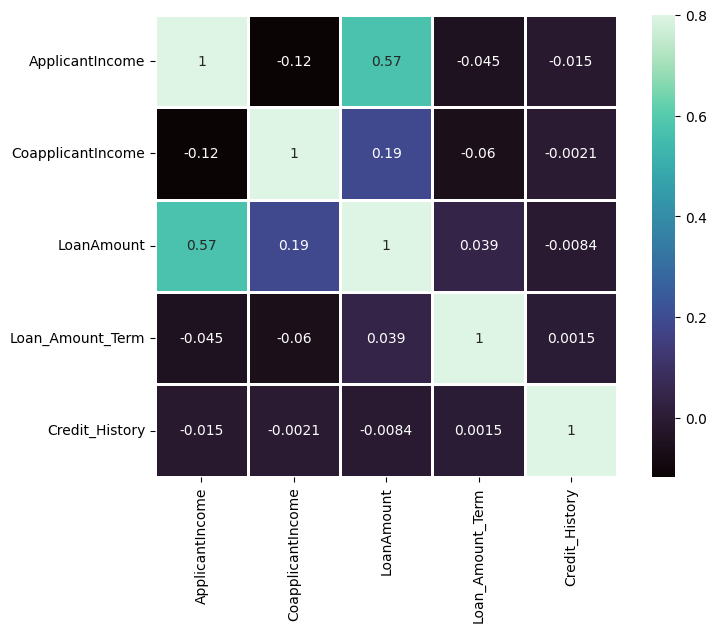

In [4]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, annot=True ,square=True, linewidths=1,cmap="mako");